In [ ]:
import pickle as pkl
from utils import *

In [ ]:
print_stats("base1")

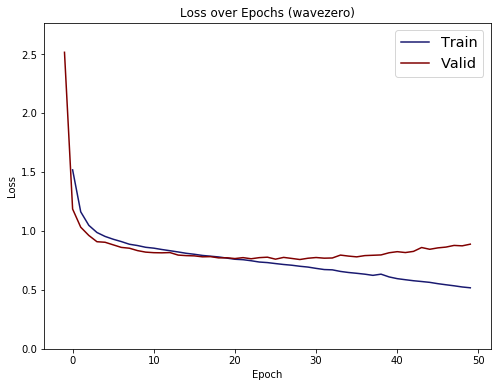

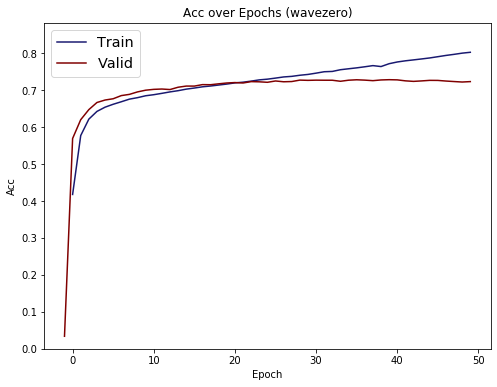

In [3]:
print_stats("wavezero")

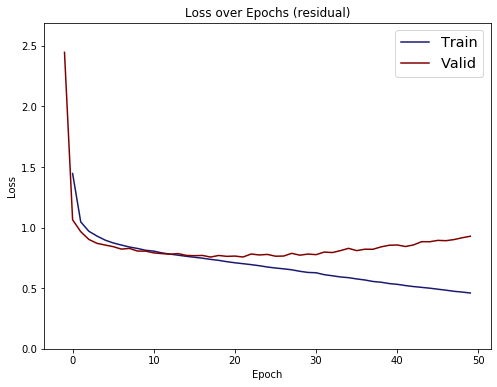

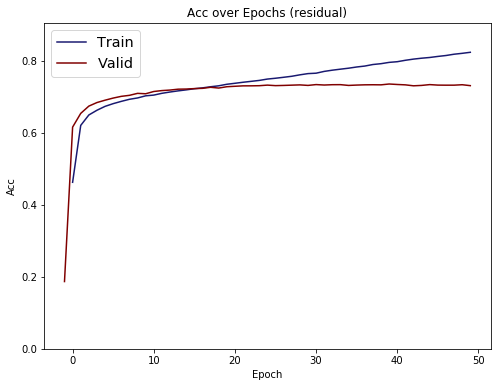

In [4]:
print_stats("residual")